In [7]:
import numpy as np

# Define constants using atomic units
hbar = 1.0  # Reduced Planck's constant in atomic units
m = 1.0     # Mass of the particle in atomic units
L = 1.0     # Width of the infinite potential well in Bohr radii (a0)

# Discretize the space
N = 2000                            # Number of grid points
x = np.linspace(-L / 2, L / 2, N)   # Discretized real-space grid from -L/2 to L/2
dx = x[1] - x[0]                    # Spatial step size

# Print the first few values to check
print(f"Grid points (x) from -L/2 to L/2 with N={N}:")
print(x[:5], '...', x[-5:])  # Displaying the first and last few points
print(f"Spatial step size (dx): {dx}")

Grid points (x) from -L/2 to L/2 with N=2000:
[-0.5        -0.49949975 -0.4989995  -0.49849925 -0.497999  ] ... [0.497999   0.49849925 0.4989995  0.49949975 0.5       ]
Spatial step size (dx): 0.0005002501250625513


In [8]:
def construct_laplacian(N, dx):
    """
    Construct the Laplacian matrix using finite difference method.
    
    : N: Number of points in the discretized grid.
    : dx: Spacing between adjacent points on the grid.
    :return: Laplacian matrix of size N x N.
    """
    # Coefficient for the Laplacian matrix
    coefficient = 1 / (dx ** 2)
    
    # Main diagonal with -2
    main_diag = -2 * np.ones(N)
    
    # Off-diagonal with 1
    off_diag = np.ones(N - 1)
    
    # Construct the Laplacian matrix using np.diag
    laplacian = coefficient * (np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1))
    
    return laplacian

# Construct the Laplacian matrix
laplacian_matrix = construct_laplacian(N, dx)

# Print the constructed Laplacian matrix 
print("Constructed Laplacian Matrix:")
print(laplacian_matrix)

Constructed Laplacian Matrix:
[[-7992001.99999936  3996000.99999968        0.         ...
         0.                0.                0.        ]
 [ 3996000.99999968 -7992001.99999936  3996000.99999968 ...
         0.                0.                0.        ]
 [       0.          3996000.99999968 -7992001.99999936 ...
         0.                0.                0.        ]
 ...
 [       0.                0.                0.         ...
  -7992001.99999936  3996000.99999968        0.        ]
 [       0.                0.                0.         ...
   3996000.99999968 -7992001.99999936  3996000.99999968]
 [       0.                0.                0.         ...
         0.          3996000.99999968 -7992001.99999936]]


In [10]:
def construct_laplacian(N, dx):
    """
    Construct the Laplacian matrix using the finite difference method.
    
    :param N: Number of points in the discretized grid.
    :param dx: Spacing between adjacent points on the grid.
    :return: Laplacian matrix of size N x N.
    """
    # Coefficient for the Laplacian matrix
    coefficient = 1 / (dx ** 2)
    
    # Main diagonal with -2
    main_diag = -2 * np.ones(N)
    
    # Off-diagonal with 1
    off_diag = np.ones(N - 1)
    
    # Construct the Laplacian matrix using np.diag
    laplacian = coefficient * (np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1))
    
    return laplacian

def construct_hamiltonian(laplacian):
    """
    Construct the Hamiltonian matrix from the Laplacian matrix in atomic units.
    
    :param laplacian: The Laplacian matrix.
    :return: Hamiltonian matrix.
    """
    # Hamiltonian in atomic units: H = -1/2 * Laplacian
    hamiltonian = -0.5 * laplacian
    return hamiltonian


# Construct the Laplacian matrix
laplacian_matrix = construct_laplacian(N, dx)

# Construct the Hamiltonian matrix
hamiltonian_matrix = construct_hamiltonian(laplacian_matrix)

# Print the first 5x5 block of the Hamiltonian matrix to verify
print("Constructed Hamiltonian Matrix:")
print(hamiltonian_matrix)

Constructed Hamiltonian Matrix:
[[ 4000000. -2000000.       -0. ...       -0.       -0.       -0.]
 [-2000000.  4000000. -2000000. ...       -0.       -0.       -0.]
 [      -0. -2000000.  4000000. ...       -0.       -0.       -0.]
 ...
 [      -0.       -0.       -0. ...  4000000. -2000000.       -0.]
 [      -0.       -0.       -0. ... -2000000.  4000000. -2000000.]
 [      -0.       -0.       -0. ...       -0. -2000000.  4000000.]]


In [21]:
def solve_eigenvalues_and_eigenfunctions(hamiltonian):
    """
    Solve for the eigenvalues and eigenfunctions of the Hamiltonian matrix.
    
    : hamiltonian: The Hamiltonian matrix.
    : return: Sorted eigenvalues and corresponding eigenfunctions.
    """
    # Compute eigenvalues and eigenvectors of the Hamiltonian
    eigenvalues, eigenfunctions = np.linalg.eig(hamiltonian)
    
    # Sort the eigenvalues and corresponding eigenfunctions
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenfunctions = eigenfunctions[:, sorted_indices]
    
    # Extract the first seven energy levels
    first_seven_energies = sorted_eigenvalues[:7]
    
    return first_seven_energies, sorted_eigenfunctions

# Solve for eigenvalues and eigenfunctions
first_seven_energies, eigenfunctions = solve_eigenvalues_and_eigenfunctions(hamiltonian_matrix)

# Print the first seven energy levels
print("First seven energy levels (in atomic units):")
for i, energy in enumerate(first_seven_energies, start=1):
    print(f"Energy level {i}: {energy:.2f} a.u.")

First seven energy levels (in atomic units):
Energy level 1: 4.93 a.u.
Energy level 2: 19.72 a.u.
Energy level 3: 44.37 a.u.
Energy level 4: 78.88 a.u.
Energy level 5: 123.25 a.u.
Energy level 6: 177.47 a.u.
Energy level 7: 241.56 a.u.


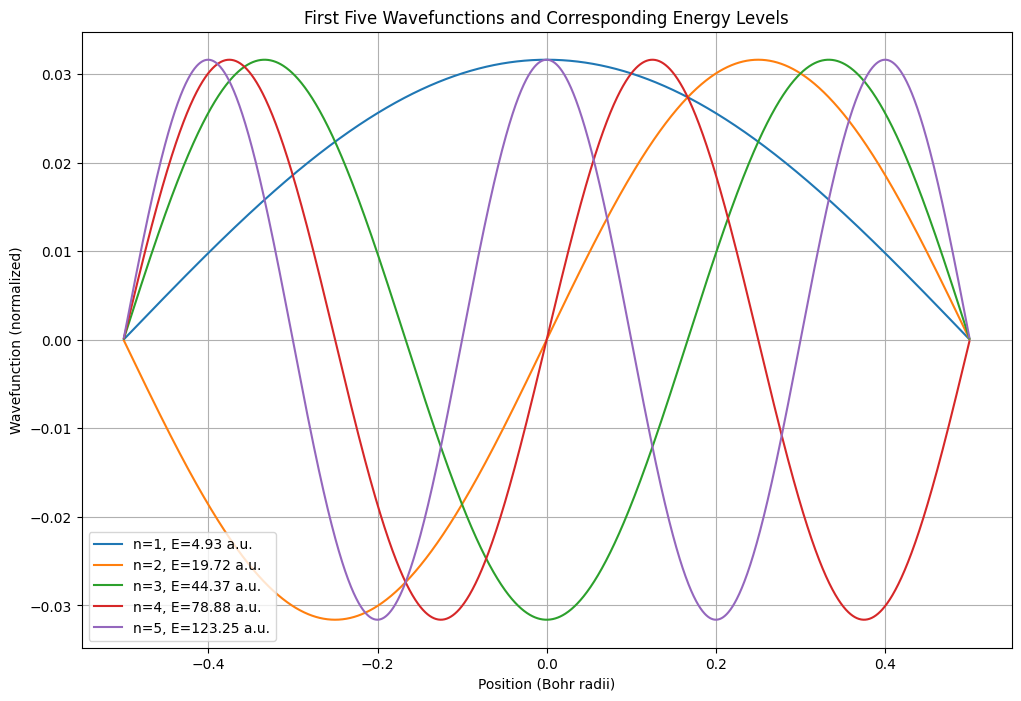

In [18]:
import matplotlib.pyplot as plt

def plot_wavefunctions_and_energies(x, energies, wavefunctions, num_wavefunctions):
    """
    Plot the first few wavefunctions and their corresponding energy levels.
    
    :x: Discretized spatial grid points.
    :energies: Array of sorted eigenvalues (energy levels).
    :wavefunctions: Array of sorted eigenfunctions (wavefunctions).
    :num_wavefunctions: Number of wavefunctions to plot.
    """
    plt.figure(figsize=(12, 8))
    
    # Plot the first few wavefunctions
    for i in range(num_wavefunctions):
        plt.plot(x, wavefunctions[:, i], label=f'n={i + 1}, E={energies[i]:.2f} a.u.')
    
    # Label the axes
    plt.xlabel('Position (Bohr radii)')
    plt.ylabel('Wavefunction (normalized)')
    plt.title('First Five Wavefunctions and Corresponding Energy Levels')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create the spatial grid
x = np.linspace(-L / 2, L / 2, N)

# Plot the first five wavefunctions and their corresponding energies
plot_wavefunctions_and_energies(x, first_seven_energies, eigenfunctions, num_wavefunctions=5)